We are going to use the famous iris data set for our KNN example. 


The dataset consists of four attributes: sepal-width, sepal-length, petal-width and petal-length. 



These are the attributes of specific types of iris plant. 


The task is to predict the class to which these plants belong. There are three classes in the dataset: Iris-setosa, Iris-versicolor and Iris-virginica. 


Further details of the dataset are available here.
https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

## Question

Please import, preprocess the data, train-test split, feature scale it, make predictions, and please evaluate it. 

Please also calculate the error rate for K values of 1 to 40. 

In each iteration the mean error for predicted values of test set is calculated and the result is appended to the error list.

The next step is to plot the error values against K values.

In [37]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


In [236]:
# 1. load the data      0 = iris-setosa, 1 = iris-virginica, 2 = iris-versicolor
iris = pd.read_csv('iris.csv')  # load data
iris.head()
iris = iris.replace('Iris-setosa',0)       # create dummy variables
iris = iris.replace('Iris-virginica',1)
iris = iris.replace('Iris-versicolor',2)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [237]:
X = iris.iloc[:,0:4]
y = iris.species


In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [239]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [262]:
result = pd.DataFrame(np.zeros((X_test.shape[0])))
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    result[i] = pd.DataFrame(knn.predict(X_test))
    

In [265]:
test=[]
for i in range(1,result.shape[1]):
    test.append(sum(np.diag(confusion_matrix(y_test, result.iloc[:,i])))/sum(sum(confusion_matrix(y_test, result.iloc[:,i]))))
    

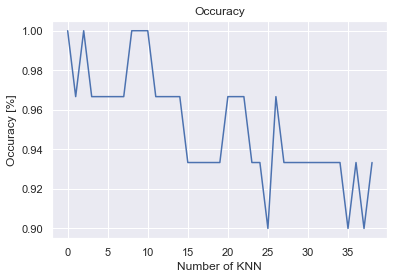

In [266]:

plt.plot(test)
plt.title('Occuracy')
plt.xlabel('Number of KNN')
plt.ylabel('Occuracy [%]');

In [257]:
### Solution 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

error = []


for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(1-np.mean(pred_i != y_test))

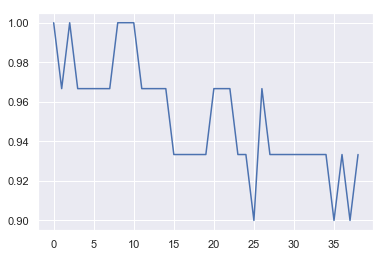

In [258]:
plt.plot(error)